In [43]:
import pandas as pd
import json

# Pandas warning messages (optional)
pd.options.mode.chained_assignment = None  #default='warn'

In [44]:
# Read the timestamps of user login data
user_logins = pd.read_json('logins.json')

In [45]:
# Read the sample dataset of users who signed up for an Ultimate account in January 2014.
with open('ultimate_data_challenge.json') as file:
    data = json.load(file)

In [46]:
# Create a df from the ultimate_data_challenge.json data file 
df = pd.DataFrame(data)

In [47]:
# Let's look at the first few rows of df
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [48]:
# Let's check for null values in df
df.isnull().sum().sort_values(ascending=False)

avg_rating_of_driver      8122
phone                      396
avg_rating_by_driver       201
avg_dist                     0
weekday_pct                  0
ultimate_black_user          0
surge_pct                    0
last_trip_date               0
avg_surge                    0
signup_date                  0
trips_in_first_30_days       0
city                         0
dtype: int64

In [49]:
# Let's check the first few rows of our timestamp login data
user_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [50]:
# Let's check for null values in our data
user_logins.isnull().sum()

login_time    0
dtype: int64

In [51]:
# Checking .info() to make sure dtype is datetime for login_time column
user_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [52]:
#Converting timestamp to Datetime 
user_logins = pd.to_datetime(user_logins['login_time'], unit='s')
user_logins = pd.DataFrame(user_logins)
user_logins.set_index('login_time', inplace = True)
user_logins['count'] = 1

In [53]:
user_logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [54]:
user_logins.shape

(93142, 1)

In [55]:
# 15 minute aggregate intervels
agg15 = user_logins.resample('15T').sum()
agg15.reset_index(inplace = True)

In [56]:
import plotly.graph_objects as go

def time_graph(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['login_time'], y=data['count'], name="User Login Frequency Count",
                             line_color='red'))

    fig.update_layout(title_text='User Login Frequency Count', width=1000,
        height=700, xaxis_rangeslider_visible=True)

    fig.show()

In [57]:
time_graph(agg15)

In [58]:
# hourly aggregate intervels
agg_hour = user_logins.resample('1H').sum()
agg_hour.reset_index(inplace = True)

In [59]:
time_graph(agg_hour)

In [60]:
# Daily aggregate intervels
agg_day = user_logins.resample('1D').sum()
agg_day.reset_index(inplace = True)

In [61]:
time_graph(agg_day)

In [62]:
#Weekend vs Weekday Login
user_logins.reset_index(inplace = True)
day_of_week = user_logins['login_time'].dt.day_name()
agg_day['login_time'] = agg_day['login_time'].dt.day_name()

In [63]:
agg_day.rename(columns = {'login_time': 'day_of_week'}, inplace = True)

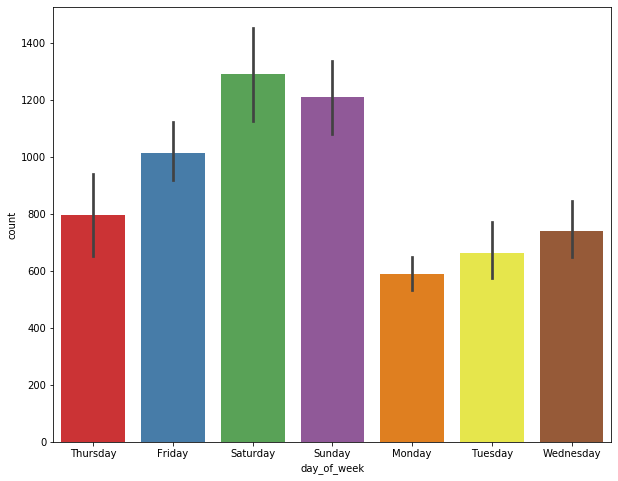

In [64]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(x='day_of_week', y= "count", data=agg_day, orient='v', palette="Set1")

plt.show()

In [65]:
day_count = pd.DataFrame(day_of_week.value_counts())

In [66]:
day_count.reset_index(inplace = True)

In [67]:
day_count = day_count.rename(columns={'index':'day_of_week','login_time':'count'})

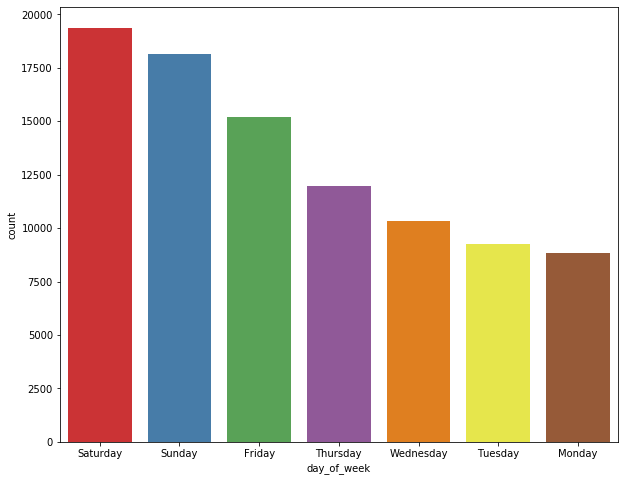

In [68]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(x="day_of_week", y= "count", data=day_count, orient='v', palette="Set1")

plt.show()

In [69]:
import numpy as np
user_logins['day'] = user_logins['login_time'].dt.day_name()
user_logins['day_of_week'] = np.where(user_logins['day'] == 'Saturday', 'weekend', user_logins['day'])
user_logins['day_of_week'] = np.where(user_logins['day_of_week'] == 'Sunday', 'weekend', user_logins['day_of_week'])
user_logins['day_of_week'] = np.where(user_logins['day_of_week'] == 'weekend', 'weekend', 'weekday')

In [70]:
user_logins['hour'] = user_logins['login_time'].dt.time

In [71]:
type(user_logins['hour'][0])

datetime.time

In [72]:
import datetime
user_logins['min_15'] = user_logins['login_time'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,15*(dt.minute // 15)))

In [73]:
user_logins['min_15'] = user_logins['min_15'].dt.time

In [74]:
weekday = user_logins[user_logins['day_of_week'] == 'weekday']
weekend = user_logins[user_logins['day_of_week'] == 'weekend']

In [75]:
count_week = pd.DataFrame(weekday['min_15'].value_counts().reset_index())

In [76]:
count_week = count_week.sort_values('index')

In [77]:
count_week = count_week.rename(columns={'index':'login_time','min_15':'count'})

In [78]:
# Weekday Login Counts
time_graph(count_week)

In [79]:
# Weekend Login Counts
count_weekend = pd.DataFrame(weekend['min_15'].value_counts().reset_index())
count_weekend = count_weekend.sort_values('index')
count_weekend = count_weekend.rename(columns={'index':'login_time','min_15':'count'})

In [80]:
time_graph(count_weekend)

In [81]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [82]:
#Checking for null values in df
df.isnull().sum().sort_values(ascending=False)

avg_rating_of_driver      8122
phone                      396
avg_rating_by_driver       201
avg_dist                     0
weekday_pct                  0
ultimate_black_user          0
surge_pct                    0
last_trip_date               0
avg_surge                    0
signup_date                  0
trips_in_first_30_days       0
city                         0
dtype: int64

In [83]:
# Let's look at the .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [84]:
df[df['avg_dist'] == 0].head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
72,Astapor,1,2014-01-07,5.0,1.0,2014-01-08,iPhone,0.0,False,100.0,0.0,3.0
116,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.0,5.0
188,Winterfell,1,2014-01-11,NaN,1.0,2014-01-14,Android,0.0,False,100.0,0.0,5.0
356,Winterfell,1,2014-01-15,4.0,1.0,2014-01-16,Android,0.0,False,100.0,0.0,5.0
479,Winterfell,1,2014-01-24,5.0,1.0,2014-01-25,iPhone,0.0,False,0.0,0.0,5.0


In [85]:
df = df[df['avg_dist'] != 0]

In [86]:
df[df['avg_dist'] == 0].head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver


In [87]:
df.isnull().sum().sort_values(ascending=False)

avg_rating_of_driver      8045
phone                      395
avg_rating_by_driver       200
avg_dist                     0
weekday_pct                  0
ultimate_black_user          0
surge_pct                    0
last_trip_date               0
avg_surge                    0
signup_date                  0
trips_in_first_30_days       0
city                         0
dtype: int64

In [88]:
df['signup_date'] = pd.to_datetime(df['signup_date']) 
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [89]:
# Let's look at the difference between signup date and last trip date
df['signup_lasttrip_diff'] = df['last_trip_date'] - df['signup_date']

In [90]:
df['signup_lasttrip_diff']

0       143 days
1        96 days
2         1 days
3       170 days
4        47 days
          ...   
49994   148 days
49995   131 days
49997   111 days
49998     1 days
49999    92 days
Name: signup_lasttrip_diff, Length: 49850, dtype: timedelta64[ns]

In [91]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [92]:
last_30_days = df['last_trip_date'].max() - pd.Timedelta(days=30)
last_30_days

Timestamp('2014-06-01 00:00:00')

In [93]:
# We consider a user retained if they were “active” (i.e. took a trip) in the last 30 days.
retained = df[df['last_trip_date'] >= last_30_days]

In [94]:
# Create 'active' column and set it to 'Yes' for all the active users in retained
retained['active'] = 'Yes'

In [95]:
retained.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_lasttrip_diff,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,Yes
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,Yes
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,148 days,Yes
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0,130 days,Yes
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0,168 days,Yes


In [96]:
# Creating an 'active' column and assigning it the values from the retained dataframe
df['active'] = retained['active']

In [97]:
df['active'].head()

0    Yes
1    NaN
2    NaN
3    Yes
4    NaN
Name: active, dtype: object

In [98]:
# Assigning all the null values in the newly created 'active' column to 'No' Which means they were not in the retained df
df['active'] = df['active'].replace(np.nan, 'No')

In [99]:
(df['active'] == 'Yes').sum()

18789

In [100]:
(df['active'] == 'No').sum()

31061

In [101]:
df_clean = df[df['avg_rating_of_driver'] > 0]
df_clean = df_clean[df_clean['avg_rating_by_driver'] > 0]
df_clean['phone'] = df_clean['phone'].astype(str)
df_clean['phone'].replace('NaN',0)
df_clean = df_clean[df_clean['phone'] != 'nan']

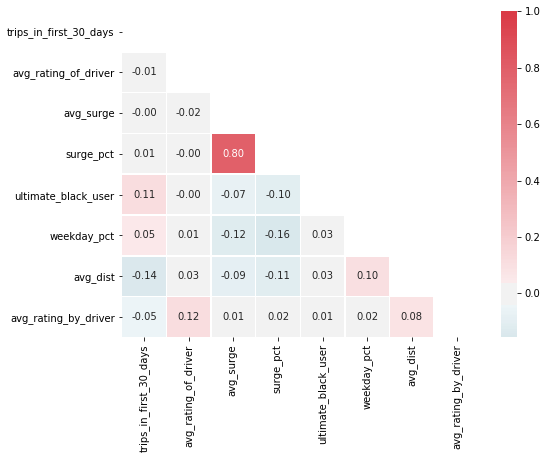

In [102]:

# Let's look at the correlation between numericals columns

# Create the correlation matrix
corr= df_clean.corr()[:30]
# Draw the heatmap

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt=".2f")
plt.show()

In [103]:
phone_use = pd.DataFrame(df_clean['phone'].value_counts().reset_index())
city_count = pd.DataFrame(df_clean['city'].value_counts().reset_index())
ultimate_count = pd.DataFrame(df_clean['ultimate_black_user'].value_counts().reset_index())

In [105]:
phone_use

,index,phone
0,iPhone,29307
1,Android,12065
2,None,299


In [106]:
city_count

,index,city
0,Winterfell,19271
1,Astapor,13579
2,King's Landing,8821


In [107]:
ultimate_count

,index,ultimate_black_user
0,False,25584
1,True,16087


In [108]:
ultimate_count['index'] = np.where(ultimate_count['index'] == True, 'ultimate_black_user', 'non_ultimate_user')

In [109]:
#Bokeh Graph City, phone, ultimate_black_user
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.models.widgets import Panel, Tabs

output_notebook()

device = list(phone_use['index'])
counts = list(phone_use['phone'])

source = ColumnDataSource(data=dict(device=device, counts=counts))

p = figure(x_range=device, y_range=(0,40000),  plot_width=900, plot_height=700, title="User Count on Device",
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")


p.vbar(x='device', top='counts', width=0.9, color = '#FFCF2F', source=source)
p.title.align = 'center'
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = "vertical"
p.left[0].formatter.use_scientific = False
p.add_tools(HoverTool(tooltips=[("Device", "@device"), ("Count", "@counts")]))

p.title.text_font_size = '20pt'
p.xaxis.axis_label="Device Name"
p.xaxis.axis_label_text_font_size = "15pt"
p.xaxis.major_label_text_font_size = "15pt"
p.xaxis.axis_label_text_font = "helvetica"
p.xaxis.axis_label_text_color = "black"


p.yaxis.axis_label="Count"
p.yaxis.axis_label_text_font_size = "15pt"
p.yaxis.major_label_text_font_size = "15pt"
p.yaxis.axis_label_text_font = "helvetica"
p.yaxis.axis_label_text_color = "black"



tab1 = Panel(child=p, title="User Count on Device")




city = list(city_count['index'])
counts = list(city_count['city'])

source = ColumnDataSource(data=dict(city=city, counts=counts))

p1 = figure(x_range=city, y_range=(0,20000),  plot_width=900, plot_height=700, title="User Count in Cities",
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")


p1.vbar(x='city', top='counts', width=0.9, color = '#ED6E61', source=source)
p1.title.align = 'center'
p1.xgrid.grid_line_color = None
p1.xaxis.major_label_orientation = "vertical"
p1.left[0].formatter.use_scientific = False
p1.add_tools(HoverTool(tooltips=[("City", "@city"), ("Count", "@counts")]))

p1.title.text_font_size = '20pt'
p1.xaxis.axis_label="City"
p1.xaxis.axis_label_text_font_size = "15pt"
p1.xaxis.major_label_text_font_size = "15pt"
p1.xaxis.axis_label_text_font = "helvetica"
p1.xaxis.axis_label_text_color = "black"


p1.yaxis.axis_label="Count"
p1.yaxis.axis_label_text_font_size = "15pt"
p1.yaxis.major_label_text_font_size = "15pt"
p1.yaxis.axis_label_text_font = "helvetica"
p1.yaxis.axis_label_text_color = "black"

tab2 = Panel(child=p1, title="User Count in Cities")


black = list(ultimate_count['index'])
counts = list(ultimate_count['ultimate_black_user'])

source = ColumnDataSource(data=dict(black=black, counts=counts))

p2 = figure(x_range=black, y_range=(0,33000),  plot_width=900, plot_height=700, title="Ultimate User vs Non Ultimate User",
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")


p2.vbar(x='black', top='counts', width=0.9, color = '#36363B', source=source)
p2.title.align = 'center'
p2.xgrid.grid_line_color = None
p2.xaxis.major_label_orientation = "vertical"
p2.left[0].formatter.use_scientific = False
p2.add_tools(HoverTool(tooltips=[("Ultimate Black", "@black"), ("Count", "@counts")]))

p2.title.text_font_size = '20pt'
p2.xaxis.axis_label="Is Ultimate Black User?"
p2.xaxis.axis_label_text_font_size = "15pt"
p2.xaxis.major_label_text_font_size = "15pt"
p2.xaxis.axis_label_text_font = "helvetica"
p2.xaxis.axis_label_text_color = "black"


p2.yaxis.axis_label="Count"
p2.yaxis.axis_label_text_font_size = "15pt"
p2.yaxis.major_label_text_font_size = "15pt"
p2.yaxis.axis_label_text_font = "helvetica"
p2.yaxis.axis_label_text_color = "black"

tab3 = Panel(child=p2, title="Ultimate User vs Non-Ultimate")


tabs = Tabs(tabs=[tab1, tab2, tab3])
show(tabs)

Loading BokehJS ...

In [110]:
#avg_dist vs avg_rating_by_driver, 
rate = list(df_clean['avg_rating_by_driver'])
dist = list(df_clean['avg_dist'])
p = figure(plot_width=900, plot_height=500,toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset",)
source = ColumnDataSource(data=dict(rate=rate, dist=dist))


# add a circle renderer with a size, color, and alpha
p.circle('rate', 'dist', size=10, color='#1A939C', alpha=0.5, source = source)

p.add_tools(HoverTool(tooltips=[("User Rating", "@rate"), ("Distance", "@dist")]))

# change just some things about the x-axes
p.xaxis.axis_label = "Rate by Driver"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "red"

# change just some things about the y-axes
p.yaxis.axis_label = "AVG Distance"
p.yaxis.major_label_text_color = "orange"
p.yaxis.major_label_orientation = "vertical"


# show the results
show(p)

In [111]:

#avg_dist vs avg_rating_of_driver 
rate = list(df_clean['avg_rating_of_driver'])
dist = list(df_clean['avg_dist'])
p = figure(plot_width=900, plot_height=500,toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset",)
source = ColumnDataSource(data=dict(rate=rate, dist=dist))


# add a circle renderer with a size, color, and alpha
p.circle('rate', 'dist', size=10, color='#1A939C', alpha=0.5, source = source)

p.add_tools(HoverTool(tooltips=[("Driver Rating", "@rate"), ("Distance", "@dist")]))

# change just some things about the x-axes
p.xaxis.axis_label = "Rate of Driver"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "red"

# change just some things about the y-axes
p.yaxis.axis_label = "AVG Distance"
p.yaxis.major_label_text_color = "orange"
p.yaxis.major_label_orientation = "vertical"


# show the results
show(p)

In [112]:
df_clean[df_clean['avg_rating_of_driver'] == 1].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,signup_lasttrip_diff
count,245.000000,245.0,245.000000,245.000000,245.000000,245.000000,245.000000,245
mean,0.804082,1.0,1.108571,8.142857,55.042041,6.816327,4.520816,67 days 05:58:31.836734
std,0.753668,0.0,0.525230,24.177076,43.961172,6.968628,0.948432,58 days 03:23:57.508979
min,0.000000,1.0,1.000000,0.000000,0.000000,0.010000,1.000000,0 days 00:00:00
25%,0.000000,1.0,1.000000,0.000000,0.000000,2.210000,4.400000,3 days 00:00:00
50%,1.000000,1.0,1.000000,0.000000,50.000000,4.540000,5.000000,58 days 00:00:00
75%,1.000000,1.0,1.000000,0.000000,100.000000,8.730000,5.000000,126 days 00:00:00
max,4.000000,1.0,8.000000,100.000000,100.000000,47.360000,5.000000,176 days 00:00:00


In [113]:
df_clean[df_clean['avg_rating_of_driver'] == 5].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,signup_lasttrip_diff
count,20628.000000,20628.0,20628.000000,20628.000000,20628.000000,20628.000000,20628.000000,20628
mean,1.684313,5.0,1.071238,8.738879,60.838176,6.100756,4.819793,83 days 18:56:07.539267
std,2.911056,0.0,0.219747,20.566956,38.784773,5.945261,0.419267,62 days 02:14:51.441203
min,0.000000,5.0,1.000000,0.000000,0.000000,0.010000,1.000000,0 days 00:00:00
25%,0.000000,5.0,1.000000,0.000000,33.300000,2.400000,4.800000,13 days 00:00:00
50%,1.000000,5.0,1.000000,0.000000,66.700000,4.050000,5.000000,93 days 00:00:00
75%,2.000000,5.0,1.010000,3.100000,100.000000,7.612500,5.000000,143 days 00:00:00
max,125.000000,5.0,5.750000,100.000000,100.000000,79.690000,5.000000,181 days 00:00:00


In [114]:
df_clean[df_clean['avg_rating_by_driver'] == 1].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,signup_lasttrip_diff
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86
mean,0.569767,4.244186,1.088721,7.558140,66.860465,4.843605,1.0,48 days 08:22:19.534883
std,0.521101,1.301005,0.371245,26.028764,46.406430,4.906939,0.0,53 days 07:13:15.184680
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000,1.0,0 days 00:00:00
25%,0.000000,4.000000,1.000000,0.000000,0.000000,1.517500,1.0,1 days 00:00:00
50%,1.000000,5.000000,1.000000,0.000000,100.000000,2.835000,1.0,21 days 12:00:00
75%,1.000000,5.000000,1.000000,0.000000,100.000000,5.917500,1.0,85 days 06:00:00
max,2.000000,5.000000,3.250000,100.000000,100.000000,18.280000,1.0,168 days 00:00:00


In [115]:
df_clean[df_clean['avg_rating_by_driver'] == 5].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,signup_lasttrip_diff
count,21708.000000,21708.000000,21708.000000,21708.000000,21708.000000,21708.000000,21708.0,21708
mean,1.365580,4.657992,1.075817,8.989847,61.077879,6.399458,5.0,75 days 22:26:43.980099
std,1.804806,0.639345,0.241339,21.670215,40.096884,6.133258,0.0,61 days 12:00:17.221495
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000,5.0,0 days 00:00:00
25%,0.000000,4.500000,1.000000,0.000000,25.000000,2.440000,5.0,6 days 00:00:00
50%,1.000000,5.000000,1.000000,0.000000,66.700000,4.290000,5.0,77 days 00:00:00
75%,2.000000,5.000000,1.000000,0.000000,100.000000,8.160000,5.0,136 days 00:00:00
max,53.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.0,181 days 00:00:00


In [117]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [118]:
# Importing Required Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import xgboost as xgb

import plotly.graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode
import plotly.express as px

In [119]:
df_clean.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_lasttrip_diff,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,Yes
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,No
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,No
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,Yes
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,No


In [120]:
# 1 is active 0 is non-active
df_clean['active'] = pd.get_dummies(df_clean['active'], sparse=True)

In [121]:
df_clean.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_lasttrip_diff,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,1


In [122]:
features_list = ['city', 'avg_rating_of_driver', 
                     'avg_surge', 'phone', 'ultimate_black_user', 'avg_dist',
                    'avg_rating_by_driver','weekday_pct', 'signup_lasttrip_diff']

In [123]:
features = df_clean[features_list]

In [124]:
# Create dummy variables for columns in features
features = pd.get_dummies(features, drop_first=True)
features.head()

,avg_rating_of_driver,avg_surge,ultimate_black_user,avg_dist,avg_rating_by_driver,weekday_pct,signup_lasttrip_diff,city_King's Landing,city_Winterfell,phone_None,phone_iPhone
0,4.7,1.10,True,3.67,5.0,46.2,143 days,1,0,0,1
1,5.0,1.00,False,8.26,5.0,50.0,96 days,0,0,0,0
2,4.3,1.00,False,0.77,5.0,100.0,1 days,0,0,0,1
3,4.6,1.14,True,2.36,4.9,80.0,170 days,1,0,0,1
4,4.4,1.19,False,3.13,4.9,82.4,47 days,0,1,0,0


In [125]:
features['ultimate_black_user'] = pd.get_dummies(features['ultimate_black_user'])

In [126]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41671 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   avg_rating_of_driver  41671 non-null  float64        
 1   avg_surge             41671 non-null  float64        
 2   ultimate_black_user   41671 non-null  uint8          
 3   avg_dist              41671 non-null  float64        
 4   avg_rating_by_driver  41671 non-null  float64        
 5   weekday_pct           41671 non-null  float64        
 6   signup_lasttrip_diff  41671 non-null  timedelta64[ns]
 7   city_King's Landing   41671 non-null  uint8          
 8   city_Winterfell       41671 non-null  uint8          
 9   phone_None            41671 non-null  uint8          
 10  phone_iPhone          41671 non-null  uint8          
dtypes: float64(5), timedelta64[ns](1), uint8(5)
memory usage: 2.4 MB


In [127]:
features['signup_lasttrip_diff'].dt.days

0        143
1         96
2          1
3        170
4         47
        ... 
49993    179
49994    148
49995    131
49997    111
49998      1
Name: signup_lasttrip_diff, Length: 41671, dtype: int64

In [128]:
features['signup_lasttrip_diff'] = features['signup_lasttrip_diff'].dt.days

In [129]:
scaler = MinMaxScaler()
numerical = ['avg_rating_of_driver', 'avg_surge', 'avg_dist', 'avg_rating_by_driver', 'weekday_pct', 'signup_lasttrip_diff']
#numerical.head()
features_scaled = features.copy()
features_scaled[numerical] = scaler.fit_transform(features_scaled[numerical])

In [130]:
features_scaled.head()

,avg_rating_of_driver,avg_surge,ultimate_black_user,avg_dist,avg_rating_by_driver,weekday_pct,signup_lasttrip_diff,city_King's Landing,city_Winterfell,phone_None,phone_iPhone
0,0.925,0.014286,0,0.045934,1.000,0.462,0.790055,1,0,0,1
1,1.000,0.000000,1,0.103539,1.000,0.500,0.530387,0,0,0,0
2,0.825,0.000000,1,0.009538,1.000,1.000,0.005525,0,0,0,1
3,0.900,0.020000,0,0.029493,0.975,0.800,0.939227,1,0,0,1
4,0.850,0.027143,1,0.039157,0.975,0.824,0.259669,0,1,0,0


In [131]:
X = features_scaled.copy()
y = df_clean['active']

In [132]:
X.head()

,avg_rating_of_driver,avg_surge,ultimate_black_user,avg_dist,avg_rating_by_driver,weekday_pct,signup_lasttrip_diff,city_King's Landing,city_Winterfell,phone_None,phone_iPhone
0,0.925,0.014286,0,0.045934,1.000,0.462,0.790055,1,0,0,1
1,1.000,0.000000,1,0.103539,1.000,0.500,0.530387,0,0,0,0
2,0.825,0.000000,1,0.009538,1.000,1.000,0.005525,0,0,0,1
3,0.900,0.020000,0,0.029493,0.975,0.800,0.939227,1,0,0,1
4,0.850,0.027143,1,0.039157,0.975,0.824,0.259669,0,1,0,0


In [133]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: active, dtype: uint8

In [134]:
# Logistic Regression 
lrc = LogisticRegression(random_state=42)

In [135]:
cross_val_score(lrc, X, y, cv=5, scoring = 'accuracy').mean()

0.9584603655222879

In [136]:
# Random Forest
rfc = RandomForestClassifier(random_state=42)

In [137]:
cross_val_score(rfc, X, y, cv=5, scoring = 'accuracy').mean()

0.956660572853032

In [138]:
# XGBOOST
xgb_clf = xgb.XGBClassifier(random_state=42)

In [139]:
cross_val_score(xgb_clf, X, y, cv = 5, scoring = 'accuracy').mean()

0.9560846678756401

In [140]:
# split the data to test & training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42)

In [141]:
# Logistic Regression with RandomizedSearchCV to find the best parameters 
lrc = LogisticRegression(random_state=42)
# Hyperparameter tuning 
max_iter = range(10,1000,10)

solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
C = np.linspace(0, 20, 50)

# Create hyperparameter options
param_grid = {'C': np.linspace(0, 20, 50),
              'max_iter': range(10,1000,10),
              'solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']}

lrc_cv = RandomizedSearchCV(lrc, param_grid, cv=5, n_jobs=-1, n_iter = 10, random_state = 42)
%time lrc_fit = lrc_cv.fit(X_train, y_train)

Wall time: 7.32 s


In [142]:
lrc_fit.best_params_

{'solver': 'lbfgs', 'max_iter': 880, 'C': 15.918367346938776}

In [143]:
lrc = LogisticRegression(solver = 'lbfgs', max_iter = 880, C = 15.9183, random_state=42)
%time lrc.fit(X_train, y_train)
y_pred = lrc.predict(X_test)
accuracy_score(y_test, y_pred)

Wall time: 432 ms


0.9556088782243551

In [144]:
# From sklearn.metrics import classification_report
target_names = ['Active', 'Non-Active']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Active       0.94      0.95      0.95      3421
  Non-Active       0.97      0.96      0.96      4914

    accuracy                           0.96      8335
   macro avg       0.95      0.96      0.95      8335
weighted avg       0.96      0.96      0.96      8335



In [145]:
# Random Forest with RandomizedSearchCV to find the best parameters  
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': range(100,1000,100),
    'max_depth': [5, 50, 100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc_cv = RandomizedSearchCV(rfc, param_grid, cv=5, n_jobs=-1, n_iter = 10, random_state = 42)
%time rfc_fit = rfc_cv.fit(X_train, y_train)

Wall time: 1min 47s


In [146]:
rfc_fit.best_params_

{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 300}

In [147]:
rfc_fit.best_score_

0.9572235200477529

In [150]:
rfc = RandomForestClassifier(n_estimators = 700, max_features = 'log2', max_depth = 300, random_state=42)
%time rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

Wall time: 32.2 s


0.9545290941811637

In [151]:
importances = rfc.feature_importances_

In [152]:
sorted(zip(importances, X_test), reverse=True)

[(0.7536862214587575, 'signup_lasttrip_diff'),
 (0.05227825772145994, 'avg_rating_by_driver'),
 (0.03976190575052395, 'weekday_pct'),
 (0.03881475278453047, 'avg_dist'),
 (0.03638403265981951, 'avg_surge'),
 (0.02733398142727563, "city_King's Landing"),
 (0.017387490953295826, 'phone_iPhone'),
 (0.01718818068363617, 'avg_rating_of_driver'),
 (0.012402296232009143, 'ultimate_black_user'),
 (0.0043619721330254504, 'city_Winterfell'),
 (0.0004009081956664031, 'phone_None')]

In [153]:
importances = pd.DataFrame({'feature': X_test.columns, 'importance': importances}).sort_values('importance', ascending=False).reset_index(drop=True)

trace = go.Bar(x=importances.feature, y=importances.importance)

layout = go.Layout(title='Random Forest Feature Importances',
                  yaxis=dict(title='Relative Importance'))

fig = go.Figure([trace], layout)
iplot(fig, filename='feature_importance.html')

In [154]:
target_names = ['Active', 'Non-Active']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Active       0.94      0.95      0.95      3421
  Non-Active       0.97      0.96      0.96      4914

    accuracy                           0.95      8335
   macro avg       0.95      0.95      0.95      8335
weighted avg       0.95      0.95      0.95      8335



In [155]:
# XGBOOST with RandomizedSearchCV to find the best parameters  
xgb_clf = xgb.XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250], 
    'max_depth': [5, 7, 11, 15],
    'learning_rate': [0.1,0.3,0.5,0.7,0.9,1],
    'alpha': [5,10,15,20]
}

xgb_cv = RandomizedSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1, n_iter = 10, random_state = 42)
%time xgb_fit = xgb_cv.fit(X_train, y_train)

Wall time: 38.5 s


In [156]:
xgb_fit.best_params_

{'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.3, 'alpha': 15}

In [157]:
xgb_fit.best_score_

0.9596533085763228

In [158]:
xgb_clf = xgb.XGBClassifier(n_estimators = 150, max_depth = 15, learning_rate = 0.3, alpha = 15, random_state=42)
%time xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

Wall time: 1.35 s


0.955128974205159

In [159]:
importances = xgb_clf.feature_importances_
sorted(zip(importances, X_test), reverse=True)

[(0.902603, 'signup_lasttrip_diff'),
 (0.033071674, "city_King's Landing"),
 (0.025310844, 'phone_iPhone'),
 (0.024226079, 'ultimate_black_user'),
 (0.005599886, 'city_Winterfell'),
 (0.0018824888, 'avg_rating_by_driver'),
 (0.0018041675, 'weekday_pct'),
 (0.0016881422, 'avg_dist'),
 (0.0014214433, 'phone_None'),
 (0.0012574929, 'avg_rating_of_driver'),
 (0.0011348675, 'avg_surge')]

In [160]:
importances = pd.DataFrame({'feature': X_test.columns, 'importance': importances}).sort_values('importance', ascending=False).reset_index(drop=True)

trace = go.Bar(x=importances.feature, y=importances.importance)

layout = go.Layout(title='XGBoost Feature Importances',
                  yaxis=dict(title='Relative Importance'))

fig = go.Figure([trace], layout)
iplot(fig, filename='feature_importance.html')

In [161]:
target_names = ['Active', 'Non-Active']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Active       0.94      0.95      0.95      3421
  Non-Active       0.97      0.96      0.96      4914

    accuracy                           0.96      8335
   macro avg       0.95      0.95      0.95      8335
weighted avg       0.96      0.96      0.96      8335



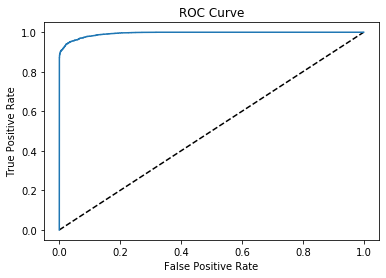

In [162]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = xgb_clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [163]:
# Compute and print AUC score
# If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(xgb_clf, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.9940242263393388
AUC scores computed using 5-fold cross-validation: [0.99388635 0.99479648 0.9947771  0.99491817 0.99465612]


In [164]:
models = [lrc,
          rfc,
          xgb_clf]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]
    results[name] = accuracy_score(y_test, y_test_preds)
    
#print(results)

LogisticRegression Model: 0.9556088782243551
RandomForestClassifier Model: 0.9545290941811637
XGBClassifier Model: 0.955128974205159


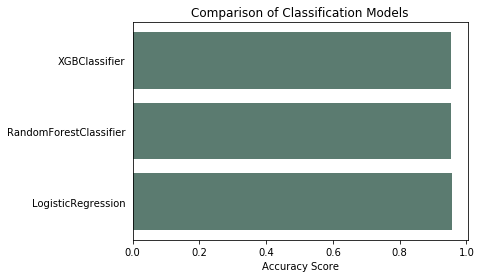

In [165]:
for model, result in results.items():
    #print(model, result)
    print('{} Model: {}'.format(model, result))

fig, ax = plt.subplots()

ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#325A4C', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('Accuracy Score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Classification Models');
#fig.savefig('images/compare_models.png', bbox_inches = 'tight')